# Sheet 4

In [97]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import root_scalar
from scipy.optimize import fsolve

## Task 1. Fixed Points, Stability, and Bifurcations

### Find the fixed points of the system. Visualize these in a graph. Are they stable?

In [98]:
w = 7
def model(x, theta = -2.5):
    return(w * 1 / (1 + np.exp(- x)) + theta)

We find the fixpoint(s) using root_scalar from scipy

In [99]:
f = lambda x: x - model(x)
fixpoint = root_scalar(f, x0 = 3)
print(fixpoint.root)

4.416471353485028


We plot the univariate nonlinear map along with the identity line in the below plot

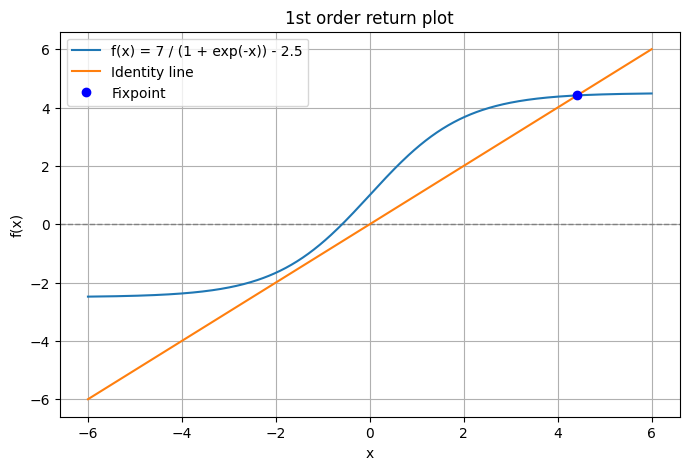

In [100]:
x_vals = np.linspace(-6, 6, 400)
y_vals = model(x_vals)

# Plotting
plt.figure(figsize=(8, 5))
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # horizontal line at y=0
plt.plot(x_vals, y_vals, label=f"f(x) = {w} / (1 + exp(-x)) - 2.5")
plt.plot(range(-6,7), range(-6,7), label=f"Identity line")
plt.plot(fixpoint.root, model(fixpoint.root), 'o', color='blue', label="Fixpoint")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("1st order return plot")
plt.legend()
plt.grid(True)
plt.show()

The fixpoint is stable (at least locally). No matter the initial value it seems that the system will converge to the fixpoint. This is seen by following the cobweb obtained by starting at a $x_0$. Furthermore the derivative of the recursive model defining the system is given by
$$f'(x_t) = \frac{w}{\exp(x_t)+\exp(-x_t) + 2}$$
And we know that the fixpoint is locally stable as long as the derivative in the point is smaller than 1 in absolute value - which is the case for the fixpoint found above. 

In [101]:
w / (np.exp(fixpoint.root)+np.exp(-fixpoint.root) + 2)

0.08253192725945438

### For $w = 7$, plot the bifurcation graph as a function of $\theta \in [−10, 0]$. Include both stable and unstable objects. How does the system change its dynamical properties as $\theta$ is varied within this range

In [102]:
theta_vals = np.linspace(-10, 0, 200)
x0_vals = np.linspace(-10, 10, 50)

theta_list = []
x_fp_list = []

for theta in theta_vals:
    for x0 in x0_vals:
        try:
            sol = root_scalar(lambda x: x - model(x, theta=theta), x0=x0, method='newton')
            if sol.converged:
                x_fp_list.append(sol.root)
                theta_list.append(theta)
        except:
            pass 


/var/folders/kq/0f1vjrnj2xn0q3t1270kq05r0000gn/T/ipykernel_27243/3930562732.py:3: RuntimeWarning: overflow encountered in exp
  return(w * 1 / (1 + np.exp(- x)) + theta)


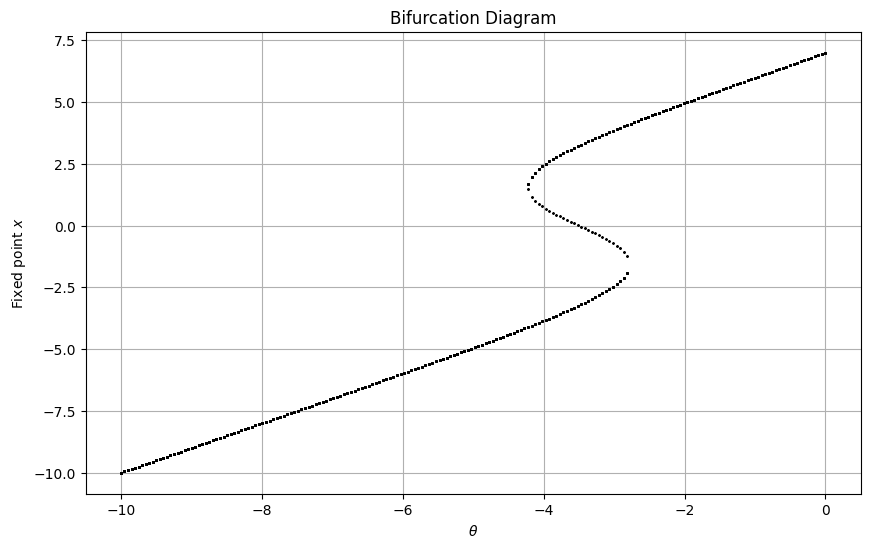

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(theta_list, x_fp_list, 'k.', markersize=1)
plt.xlabel(r'$\theta$')
plt.ylabel('Fixed point $x$')
plt.title('Bifurcation Diagram')
plt.grid(True)
plt.show()

The system has a single fixpoint up to around $\theta \approx -4.5$ , the it has two up until $\theta \approx -3$.  We investigate the stability of the fixpoints by calculating the derivative

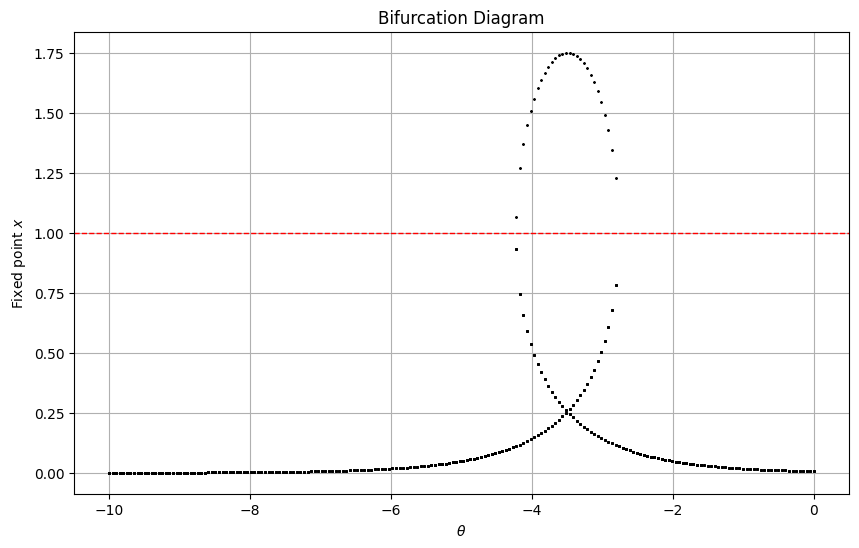

In [104]:
deriv_list = np.abs(w / (np.exp(np.array(x_fp_list))+np.exp(-np.array(x_fp_list)) + 2))

plt.figure(figsize=(10, 6))
plt.plot(theta_list, deriv_list, 'k.', markersize=1)
plt.axhline(y=1, color='red', linestyle='--', linewidth=1)
plt.xlabel(r'$\theta$')
plt.ylabel('Fixed point $x$')
plt.title('Bifurcation Diagram')
plt.grid(True)
plt.show()



So as soon as we have three fixpoints there are 

## The logistic map

### Prove that, for $0 \leq x_n \leq 1$ and $0 \leq r \leq 4$, we have $0 \leq f(x_n) \leq 1$

$f(x_n)$ is defined as
$$f(x_n) = rx_n(1-x_n) = r (x_n - x_n^2)$$
Note that $x_n \in [0,1] \Rightarrow x_n^2 \leq x_n$. Therefore we have $x_n - x_n^2 \geq 0$ and $r \geq 0$ implying 
$$f(x_n) = r (x_n - x_n^2) \geq 0$$
Establishing the lower bound. For the upper bound note that the function $0 \leq x_n - x_n^2$ for $x_n \in [0,1]$ is concave and has an optimum in $x_n = 0.5$ thus
$$f(x_n) = r (x_n - x_n^2) \leq r \cdot 0.5 \leq 4 \cdot 0.25 = 1$$

## Starting from some $x_1 \in (0, 1)$, plot a cobweb plot for $r = 0.5, 1.5, 2.5, 3.5$ and $3.9$ with $30$ steps

In [105]:
def log_map(r,x): 
    return(r * x * (1 - x))

In [106]:
num_iterations = 60
rs = [0.5, 1.5, 2.5, 3.5, 3.9]
x = np.empty((num_iterations, len(rs)))
x[0,:] = 0.2
i = -1
for i, r in enumerate(rs):
    for n in range(0, num_iterations - 1):
        if n % 2 == 0:
            x[n + 1, i] = r * x[n, i] * (1 - x[n, i])
        else: 
            x[n + 1, i] = x[n, i]

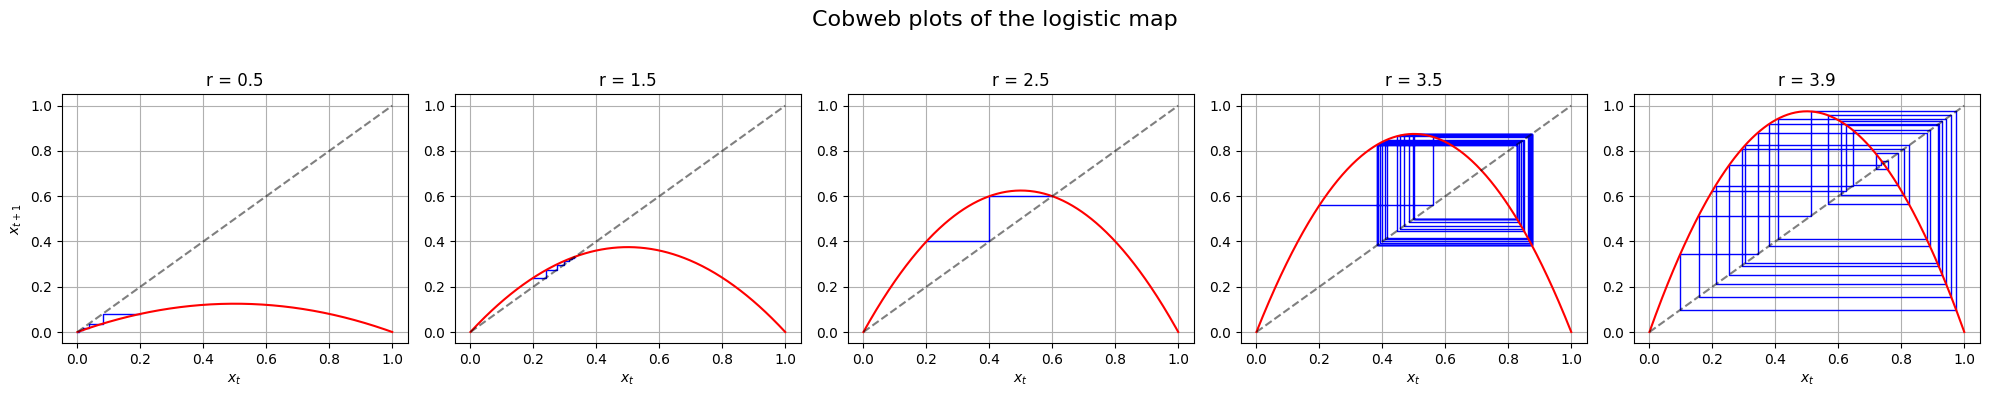

In [107]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
x_vals = np.linspace(0, 1, 400)

for i, ax in enumerate(axes):
    r = rs[i]
    # Plot the cobweb line
    ax.plot(x[0:num_iterations-2, i], x[1:num_iterations-1, i], color='blue', lw=1)
    
    # Plot f(x) = r*x*(1-x)
    ax.plot(x_vals, r * x_vals * (1 - x_vals), 'r', label=f'$f(x) = {r}x(1 - x)$')
    
    # Identity line
    ax.plot(x_vals, x_vals, 'k--', alpha=0.5)
    
    ax.set_title(f"r = {r}")
    ax.set_xlabel("$x_t$")
    if i == 0:
        ax.set_ylabel("$x_{t+1}$")
    ax.grid(True)

fig.suptitle("Cobweb plots of the logistic map", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Show that the logistic map has a cycle of order 2 for r > 3. Use that a 2-cycle requires f (q) = p and f (p) = q. What is stability of the 2-cycle? Does the stability change for some r > 3?

Let $f(q) = p$ and $f(p) = q$. This implies 
$$rq(1-q) = p$$
and 
$$rp(1-p) = q$$
Substituting the expression for $q$ into the expression of $p$ we obtain
$$r^2p(1-p)(1-rp(1-p)) = p$$
Which is equivalent to
$$-rp^3 + 2rp^2 - (1+r) p + 1 - 1/r^2 = 0$$
Which is a cubic equation. The cubic equation always has at least one real solution, implying that there is always 2-cycle for the logistic map, and specifically for $r > 3$. We can find the solutions by help of python. Below we define the a function to find the solutions of the equation and a function for computing the discriminant. If the discriminant is positive there are 3 solutions, if it is negative there is only 1. 

In [108]:
def cubic_eq(r):
    # Coefficients of the cubic: ax^3 + bx^2 + cx + d = 0
    coeffs = [-r, 2*r, -(1+r), 1-1/(r*r)]
    
    roots = np.roots(coeffs)
    return(roots)

def disc(r):
    a,b,c,d = -r, 2*r, -(1+r), 1-1/(r*r)
    return(18*a*b*c*d - 4*b*b*b*d + b*b*c*c-4*a*c*c*c-27*a*a*d*d)


We illustrate with an example

In [109]:
disc(3.5)

0.045918367346928335

So there are three real solutions to the equation. 

In [110]:
cubic_eq(3.5)

array([0.85714286, 0.71428571, 0.42857143])

We check that these indeed are 2-cycles. The first number gives us:

In [111]:
p1 = 0.85714286
q1 = log_map(3.5, p1)

print(max(abs(log_map(3.5, p1) - q1), abs(log_map(3.5, q1) - p1)))
print([p1, q1])

6.428571452943288e-09
[0.85714286, 0.4285714214285715]


So the point is 0.85714286 indeed part of a two cycle. The second point 0.42857143 is another one of the solutions to the cubic equation. We consider the last point

In [112]:
p2 = 0.71428571
print(log_map(3.5, p2))

0.7142857207142856


This is actually a fixpoint, which of course is than also a two cycle. 

Let the logistic map be denoted by $f$. We can check the stability of the 2-cycle points by finding the derivative of the function $f(f(x))$ and calculating it in the points. 

$$ \frac{df(f(x))}{dx} = -4r^3x^3 + 6r^3 x^2 - 2(r^2+r^3)x + r^2$$

In [113]:
def deriv_log_map(r,x):
    return(-4* r ** 3 * x ** 3 + 6 * r ** 3 * x ** 2 - 2 * (r ** 2 + r ** 3) * x + r ** 2)

We calculate these for our previous example

In [114]:
print(deriv_log_map(3.5, p1))
print(deriv_log_map(3.5, p2))

-1.2500001350000076
2.250000022500018


So neither of the two cycle points are stable. 

In order to check whether the stability changes for certain r values, we for a range of r values calculate the 2 cycle points and find the derivatives in these points. 

In [115]:
r_vals = np.linspace(3.00001, 5, 2000)
cycle_points = [cubic_eq(r) for r in r_vals]
deriv_vals = np.empty(shape = (2000, 3))
for i in range(2000):
    for j in range(3):
        deriv_vals[i,j] = deriv_log_map(r_vals[i], cycle_points[i][j])

We plot the results

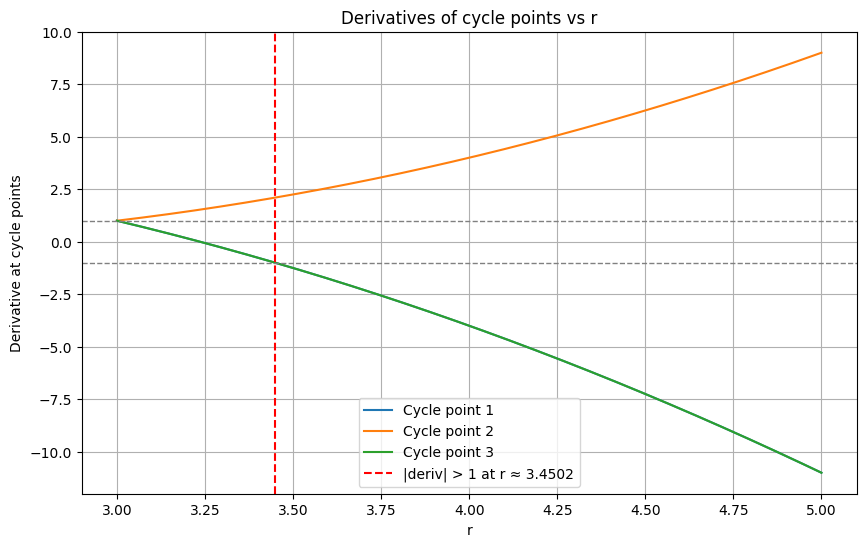

In [116]:
exceed_index = np.where(np.abs(deriv_vals[:,0]) > 1)[0][0]
r_exceed = r_vals[exceed_index]

# Plotting
plt.figure(figsize=(10, 6))

for j in range(3):
    plt.plot(r_vals, deriv_vals[:, j], label=f'Cycle point {j+1}')

plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=-1, color='gray', linestyle='--', linewidth=1)

# Vertical line at the r where |deriv| > 1
if r_exceed is not None:
    plt.axvline(x=r_exceed, color='red', linestyle='--', label=f'|deriv| > 1 at r ≈ {r_exceed:.4f}')

plt.xlabel('r')
plt.ylabel("Derivative at cycle points")
plt.title("Derivatives of cycle points vs r")
plt.legend()
plt.grid(True)
plt.show()

One of the points is always unstable. And the stability of the other two cycle is lost as soon as r > 3.4502.

### For each $ r \in \{0.001, 0.002, 0.003 . . . 3.998, 3.999\}$, produce $1000$ trajectories starting at random initial conditions with $100$ steps. Plot only the endpoints of the trajectories according to their respective $r$ in a 2D-scatter plot. 

In [117]:
r_vals = np.linspace(0.001, 3.999, 3999)
results = np.empty(shape = (len(r_vals), 1000))

for idx, r in enumerate(r_vals):
    x = np.random.uniform(size=1000)
    for _ in range(2000):
        x = log_map(r, x)
    results[idx] = x

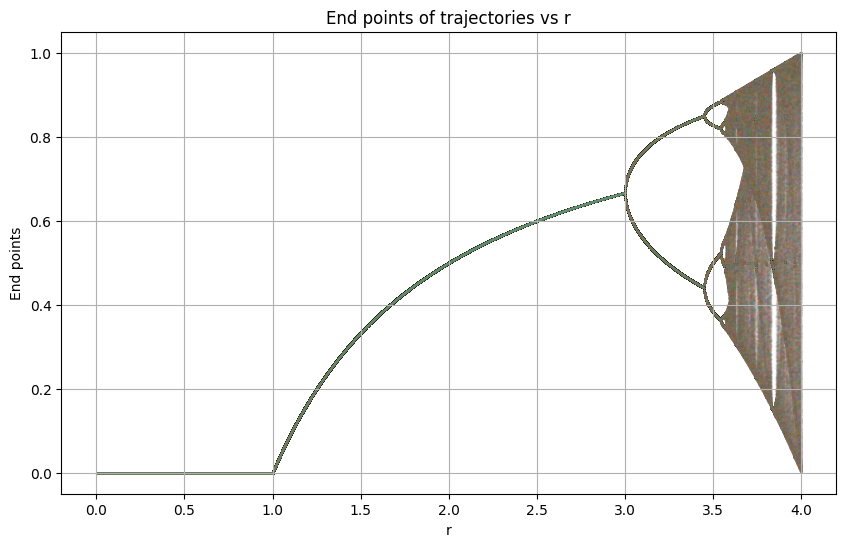

In [118]:
plt.figure(figsize=(10, 6))

for j in range(1000):
    plt.scatter(r_vals, results[:, j], alpha = 0.1, s = 0.1)
plt.xlabel('r')
plt.ylabel("End points")
plt.title("End points of trajectories vs r")
plt.grid(True)
plt.show()

### Redo the plot for $r \in \{3.44500, 3.44501, 3.44502, . . . , 3.56999, 3.57000\}$ and use it to find another $r$ such that the logistic map has a cycle of order $p \geq 3$. Then show the existence of the cycle mathematically.

In [119]:
print(np.where(r_vals > 3.44500)[0][0])
print(np.where(r_vals > 3.57)[0][0])

3445
3570


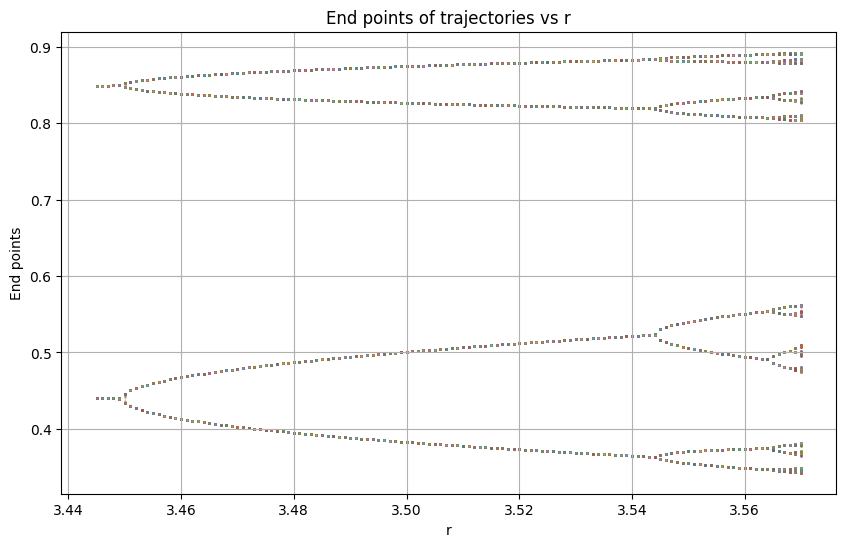

In [120]:
plt.figure(figsize=(10, 6))

for j in range(1000):
    plt.scatter(r_vals[3444:3570], results[3444:3570, j], alpha = 0.5, s = 0.3)
plt.xlabel('r')
plt.ylabel("End points")
plt.title("End points of trajectories vs r")
plt.grid(True)
plt.show()

From the plot it might be the case that the logistic map $f$ would have a cycle of $p = 4$  at e.g. $r = 3.52$. This would mean there exist $y_1, y_2, y_3, y_4 \in \mathrm{R}$ s.t. $f(y_1) = y_2$, $f(y_2) = y_3$, $f(y_3)= y_4$, $f(y_4)=y_1$. Or in other words
$$y_1 = f(y_4) = f(f(y_3)) = f(f(f(y_2))) = f(f(f(f(y_1))))$$
Manipulating these expressions oone could attempt to solve this analytically. Instead we use python. We calculate for x values in $(0,1)$ the difference between $x$ and $f(f(f(f(x))))$ and find the point where this difference is 0. 

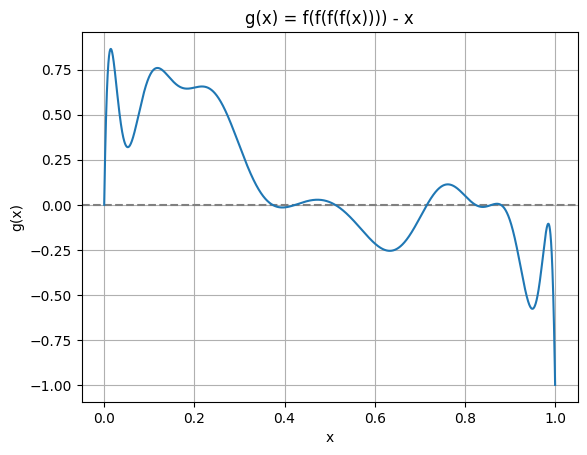

Found period-4 cycle:
  x1 = 0.512076,
  x2 = 0.879487,
  x3 = 0.373084,
  x4 = 0.823301,
  x4 = 0.512076


In [121]:
r = 3.52
def f4(x):
    return log_map(r,log_map(r,log_map(r, log_map(r, x))))

def g(x):
    return f4(x) - x

# Plot g(x) to see where it crosses zero
x_vals = np.linspace(0, 1, 10**6)
g_vals = [g(x) for x in x_vals]

plt.axhline(0, color='gray', linestyle='--')
plt.plot(x_vals, g_vals)
plt.title("g(x) = f(f(f(f(x)))) - x")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.grid(True)
plt.show()

# Use fsolve to find a root near a suspected zero
x0_guess = 0.5
x_root = fsolve(g, x0_guess)[0]

# Check the orbit
x1 = x_root
x2 = log_map(r, x1)
x3 = log_map(r, x2)
x4 = log_map(r, x3)
x5 = log_map(r, x4)

print(f"Found period-4 cycle:\n  x1 = {x1:.6f},\n  x2 = {x2:.6f},\n  x3 = {x3:.6f},\n  x4 = {x4:.6f},\n  x4 = {x5:.6f}")


The above 4 points constitute a period 4 cycle. 

### The qualitative changes in the dynamics that you can see in the diagram for certain values of r are called bifurcations. This is where the topology of the dynamics change. Develop a procedure to numerically compute the r values for the following m bifurcations, starting from r = 3.44. Describe the algorithm.

In [122]:
results_an = results[3439:4000, :]
last_period = 2
eps = 10 ** (-2)
bifurcation_points = []
bifurcation_periods = []

for idx, r in enumerate(r_vals[3439:len(r_vals)]):
    unique_vals = []
    for x in results_an[idx,:]:
        if not any(abs(x - u) < eps for u in unique_vals):
            unique_vals.append(x)
    period = len(unique_vals)
    if period > last_period:
        bifurcation_points.append(r)
        bifurcation_periods.append(period)
        last_period = period

The algorithm is developed in the above. It for each $r$ value calculates the number of distinct trajectory end points. Then it checks whether the number of distinct end points differs from that of the last period, if so, it saves the r-value, which is a bifurcation point. 

### Calculate the relative distance between successive bifurcations points
Let $2 \leq r_n \leq m − 1$ be a bifurcation point, then the relative distance is defined as
$$\delta = \frac{r_n − r_{n−1}}{r_{n+1} − r_n}$$
for all $n \in \{1, \ldots, 100\}$. What do you find?

In [123]:
delta = [None] * (len(bifurcation_points) -2)
for n in range(1,len(bifurcation_points)-1):
    delta[n-1] = (bifurcation_points[n] - bifurcation_points[n - 1]) /(bifurcation_points[n + 1] - bifurcation_points[n])

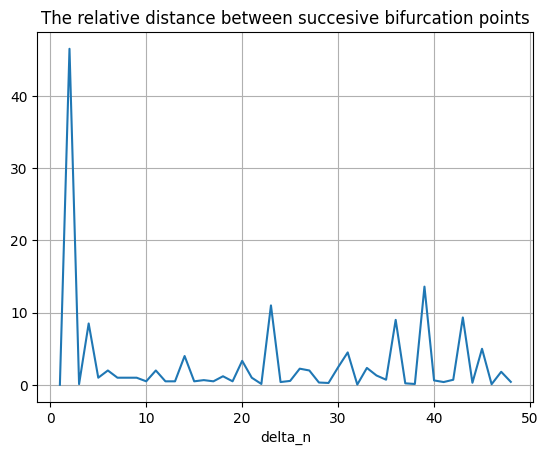

In [124]:
plt.plot(range(1,len(bifurcation_points)-1), delta)
plt.title("The relative distance between succesive bifurcation points")
plt.xlabel("delta_n")
plt.grid(True)
plt.show()

So we expected the relative distance to get smaller and smaller because the biforcations increase. But we believe the algorithm needs to be coded differently. Right now it has a hard time finding the number of fixpoints. Maybe a longer burn in is necessary. 

### Consider the map 
$$x_{n+1} = r \sin (\pi x_n)$$
**Compute the first bifurcations again for $r > 0.82$ and calculate δ from the exercise above. Make a bifurcation diagram (as with the logistic map) and see what it looks like**

We define the new map

In [125]:
def new_map(r, x):
    return(r * np.sin(np.pi * x))

We calculate the bifurcation points

In [126]:
r_vals = np.linspace(0.82001, 3, num=3000)
results = np.empty(shape = (len(r_vals), 1000))

for idx, r in enumerate(r_vals):
    x = np.random.uniform(size=1000)
    for _ in range(300):
        x = new_map(r, x)
    results[idx] = x

last_period = 2
eps = 10 ** (-3)
bifurcation_points = []
bifurcation_periods = []

for idx, r in enumerate(r_vals):
    unique_vals = []
    for x in results[idx,:]:
        if not any(abs(x - u) < eps for u in unique_vals):
            unique_vals.append(x)
    period = len(unique_vals)
    if period > last_period:
        bifurcation_points.append(r)
        bifurcation_periods.append(period)
        last_period = period
        #eps = eps * 0.5
        

We calculate the relative distancce between succesive bifurcation points

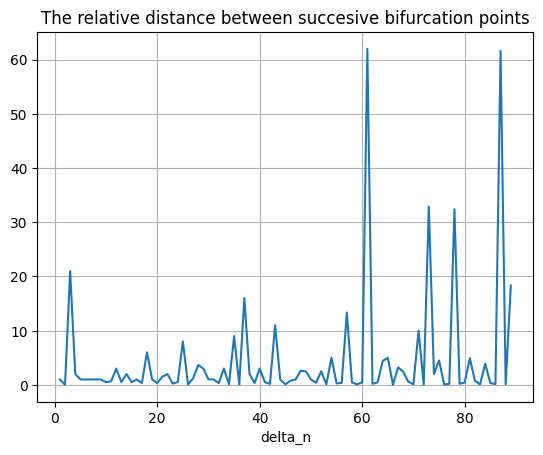

In [127]:
delta = [None] * (len(bifurcation_points) -2)
for n in range(1,len(bifurcation_points)-1):
    delta[n-1] = (bifurcation_points[n] - bifurcation_points[n - 1]) /(bifurcation_points[n + 1] - bifurcation_points[n])
    
plt.plot(range(1,len(bifurcation_points)-1), delta)
plt.title("The relative distance between succesive bifurcation points")
plt.xlabel("delta_n")
plt.grid(True)
plt.show()

The bifurcation diagram looks like

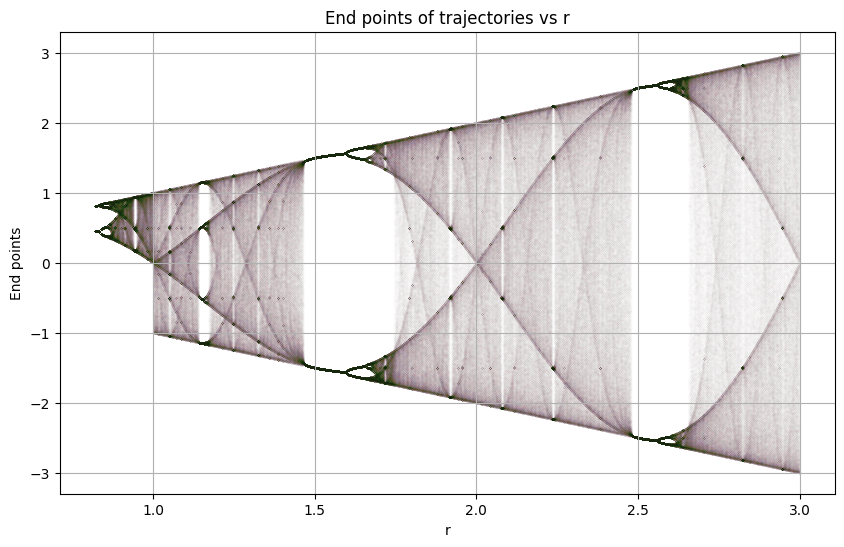

In [128]:
plt.figure(figsize=(10, 6))

for j in range(1000):
    plt.scatter(r_vals, results[:, j], alpha = 0.01, s = 0.05)
plt.xlabel('r')
plt.ylabel("End points")
plt.title("End points of trajectories vs r")
plt.grid(True)